In [1]:
import utm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load the data
data = pd.read_csv("Dataset/CleanedN.csv")
data.head()

,lat,lon,N
0,17.894722,73.401111,0.767488
1,17.894722,73.401389,0.793072
2,17.894722,73.402222,0.486061
3,17.894722,73.403889,0.997746
4,17.894722,73.404722,0.716319


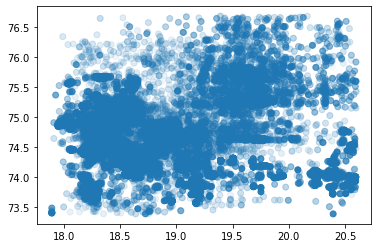

In [4]:
# plot scatter plot
plt.scatter(data['lat'].values, data['lon'].values, alpha=data['N'].values)
plt.show()

## Data Preprocessing

In [5]:
utm.from_latlon(data['lat'].values, data['lon'].values)

(array([330619.32075849, 330648.75403482, 330737.05278474, ...,
        595264.20394097, 544084.59567888, 562031.46764244]),
 array([1979264.40137435, 1979264.14895082, 1979263.39195277, ...,
        2277778.05160582, 2277721.64859547, 2277777.75937769]),
 43,
 'Q')

In [6]:
utm_lat, utm_lon, _, _ = utm.from_latlon(data['lat'].values, data['lon'].values)
data['utm_lat'] = np.round(np.log(utm_lat)*10,3)
data['utm_lon'] = np.round(np.log(utm_lon)*10, 3)

In [7]:
data.head()

,lat,lon,N,utm_lat,utm_lon
0,17.894722,73.401111,0.767488,127.087,144.982
1,17.894722,73.401389,0.793072,127.088,144.982
2,17.894722,73.402222,0.486061,127.091,144.982
3,17.894722,73.403889,0.997746,127.096,144.982
4,17.894722,73.404722,0.716319,127.099,144.982


In [8]:
data.corr()

,lat,lon,N,utm_lat,utm_lon
lat,1.000000,0.198087,0.281623,0.171930,0.999863
lon,0.198087,1.000000,0.120500,0.996432,0.198430
N,0.281623,0.120500,1.000000,0.106505,0.280078
utm_lat,0.171930,0.996432,0.106505,1.000000,0.172073
utm_lon,0.999863,0.198430,0.280078,0.172073,1.000000


In [9]:
data.head()

,lat,lon,N,utm_lat,utm_lon
0,17.894722,73.401111,0.767488,127.087,144.982
1,17.894722,73.401389,0.793072,127.088,144.982
2,17.894722,73.402222,0.486061,127.091,144.982
3,17.894722,73.403889,0.997746,127.096,144.982
4,17.894722,73.404722,0.716319,127.099,144.982


In [10]:
# Normalized data
# norm_data = (data - data.min())/(data.max()-data.min())
# norm_data = norm_data.iloc[:, :3]
# # data_norm = data - data.min(axi)

In [11]:
# split the data
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.25, random_state=0, shuffle = True)
test, val = train_test_split(test, test_size=0.20, random_state=0, shuffle=True)
print(f"Train shape: {train.shape}\nTest shape: {test.shape}\nValidation shape:{val.shape}")

Train shape: (19218, 5)
Test shape: (5125, 5)
Validation shape:(1282, 5)


In [12]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)

## Modeling

### Linear Regression

In [13]:
import statsmodels.api as sm

In [14]:
y = train['N'].values
x = train[['lat', 'lon']].values
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     900.9
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        03:02:20   Log-Likelihood:                 7232.9
No. Observations:               19218   AIC:                        -1.446e+04
Df Residuals:                   19215   BIC:                        -1.444e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8276      0.161    -17.553      0.000      -3.143      -2.512
x1             0.0742      0.002     38.257      0.000       0.070       0.078
x2             0.0227      0.002     10.342      0.000       0.018       0.027
==============================================================================
Omnibus:                     4645.716   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10484.839
Skew:                           1.380   Prob(JB):                         0.00
Kurtosis:                       5.341   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fitting an `OLS` model is defiinitely a stupid move but it gives clear insight about the relationship among the variables. In this case, looking at the `Durbin-watson` score, we see that there is positive autocorrelation among the residuals. So, a simple linear regression is not the best move for this method.

### Polynomial regression

In [15]:
# from sklearn.preprocessing.S import 

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge

In [17]:
x = train[['lat','lon']].values
y = train['N'].values
poly = PolynomialFeatures(8)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
pred = model.predict(x_poly)
r2_score(y, pred )

0.22147616030940365

### Support Vector Regressor

In [18]:
from sklearn.svm import SVR

In [19]:
model = SVR(degree=6, gamma='auto')
model.fit(x, y)
pred = model.predict(x)
r2_score(y, pred)

0.2256120251107564

### Decision tree regressor

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
model = DecisionTreeRegressor(max_depth=8)
model.fit(x, y)
pred = model.predict(test[['lat','lon']])
r2_score(test['N'].values, pred)

0.32107141640096704

## Data Augmentation

In [22]:
import scipy.spatial.distance as spd
from sklearn.metrics import pairwise_distances

In [23]:
def neighboring_points(ref_df, target_df, n_neighbors = 10, nutrient='N'):
    
    #get pairwise distance
    pwd = pairwise_distances(target_df[['lat', 'lon']].values, ref_df[['lat','lon']])
    sorted_distance = np.sort(pwd, axis=-1)
    sorted_pwd = np.argsort(pwd, axis=-1)
    temp_df = target_df.copy()
    
        
    #create temporary matrix
    temp_mat = np.zeros((sorted_pwd.shape))
    for i in range(len(temp_mat)):
        temp_mat[i] = ref_df[nutrient].values[sorted_pwd[i]]
    
    #create augmented columns
    for i in range(1, n_neighbors+1):
        cname = 'Neighbor_'+str(i)
        cname2 = 'Distance_'+str(i)
        temp_df[cname] = temp_mat[:, i]
        temp_df[cname2] = sorted_distance[:, i]
    temp_df = temp_df.iloc[:, 5:]
    temp_df[nutrient] = target_df[nutrient]
    return temp_df
    

In [24]:
%%time
aug_train_df = neighboring_points(ref_df= train, target_df=train, n_neighbors=100)

CPU times: user 1min 13s, sys: 8.16 s, total: 1min 21s
Wall time: 1min 23s


In [25]:
%%time
aug_test_df = neighboring_points(ref_df=train, target_df=test, n_neighbors=100)

CPU times: user 19.8 s, sys: 1.18 s, total: 21 s
Wall time: 19.7 s


In [26]:
%%time
aug_val_df = neighboring_points(ref_df=train, target_df=val, n_neighbors=100)

CPU times: user 5.41 s, sys: 662 ms, total: 6.07 s
Wall time: 4.98 s


In [27]:
aug_train_df.head()

,Neighbor_1,Distance_1,Neighbor_2,Distance_2,Neighbor_3,Distance_3,Neighbor_4,Distance_4,Neighbor_5,Distance_5,...,Distance_96,Neighbor_97,Distance_97,Neighbor_98,Distance_98,Neighbor_99,Distance_99,Neighbor_100,Distance_100,N
0,0.131942,0.026272,0.190826,0.030310,0.295397,0.032980,0.009604,0.033547,0.190826,0.033822,...,0.119263,0.036630,0.119393,0.293366,0.119587,0.241589,0.120288,0.229406,0.120759,0.385673
1,0.191841,0.051953,0.255802,0.053091,0.362403,0.055780,0.298443,0.057570,0.191841,0.071945,...,0.335856,0.159353,0.337077,0.298443,0.340135,0.383724,0.345778,0.341083,0.347723,0.362403
2,0.142094,0.001242,0.075342,0.001863,0.061402,0.003167,0.081179,0.004488,0.210116,0.008616,...,0.066723,0.194887,0.067496,0.079149,0.068726,0.154277,0.069338,0.221284,0.069611,0.184735
3,0.136856,0.004167,0.383724,0.015657,0.162399,0.019818,0.119759,0.025270,0.181689,0.028393,...,0.171785,0.426364,0.172020,0.383724,0.172262,0.319763,0.172312,0.145140,0.172738,0.222827
4,0.192857,0.000556,0.194887,0.000833,0.192857,0.000878,0.192857,0.001496,0.294382,0.001944,...,0.027902,0.181384,0.028090,0.136856,0.028093,0.190989,0.028774,0.155963,0.029070,0.187780


## Modelling

### Linear Regression

In [28]:
y = aug_train_df['N'].values
x = aug_train_df.iloc[:, :-1].values
print(x.shape)
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

(19218, 200)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     60.56
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        03:04:25   Log-Likelihood:                 11107.
No. Observations:               19218   AIC:                        -2.181e+04
Df Residuals:                   19017   BIC:                        -2.023e+04
Df Model:                         200                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0076      0.003      2.669      0.008       0.002       0.013
x1             0.0894      0.007     12.164      0.000       0.075       0.104
x2            -0.4977      0.255     -1.954      0.051      -0.997       0.002
x3             0.0921      0.007     12.610      0.000       0.078       0.106
x4             0.3356      0.350      0.958      0.338      -0.351       1.022
x5             0.0509      0.007      7.002      0.000       0.037       0.065
x6            -0.8022      0.421     -1.908      0.056      -1.627       0.022
x7             0.0510      0.007      7.041      0.000       0.037       0.065
x8             0.3558      0.459      0.774      0.439      -0.545       1.256
x9             0.0462      0.007      6.434      0.000       0.032       0.060
x10           -1.1394      0.522     -2.184      0.029      -2.162      -0.117
x11            0.0384      0.007      5.348      0.000       0.024       0.052
x12           -0.1183      0.583     -0.203      0.839      -1.260       1.024
x13            0.0393      0.007      5.394      0.000       0.025       0.054
x14            1.2815      0.584      2.195      0.028       0.137       2.426
x15            0.0334      0.007      4.619      0.000       0.019       0.048
x16            0.8573      0.675      1.269      0.204      -0.467       2.181
x17            0.0231      0.007      3.180      0.001       0.009       0.037
x18           -2.2637      0.735     -3.079      0.002      -3.705      -0.822
x19            0.0176      0.007      2.420      0.016       0.003       0.032
x20            1.3168      0.769      1.712      0.087      -0.191       2.825
x21            0.0369      0.007      5.016      0.000       0.022       0.051
x22           -0.0697      0.828     -0.084      0.933      -1.693       1.554
x23            0.0234      0.007      3.160      0.002       0.009       0.038
x24           -1.2012      0.862     -1.393      0.164      -2.891       0.489
x25            0.0264      0.007      3.676      0.000       0.012       0.040
x26            0.9236      0.935      0.988      0.323      -0.908       2.756
x27            0.0268      0.007      3.696      0.000       0.013       0.041
x28            0.7538      0.955      0.789      0.430      -1.118       2.626
x29            0.0265      0.007      3.645      0.000       0.012       0.041
x30           -0.4126      0.958     -0.431      0.667      -2.290       1.465
x31            0.0038      0.007      0.521      0.602      -0.010       0.018
x32           -0.3113      0.976     -0.319      0.750      -2.224       1.602
x33            0.0120      0.007      1.669      0.095      -0.002       0.026
x34            0.2009      0.958      0.210      0.834      -1.678       2.079
x35            0.0163      0.007      2.259      0.024       0.002       0.031
x3

## Modeling after augmentation

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
def model_distribution(model, train, test):
    x_train, y_train = train.iloc[:, :-1].values, train.iloc[:, -1].values
    x_test, y_test = test.iloc[:, :-1].values, test.iloc[:, -1].values
    
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, pred_train)
    r2_test = r2_score(y_test, pred_test)
 
    rmse_train = mean_squared_error(y_train, pred_train)**0.5
    rmse_test = mean_squared_error(y_test, pred_test)**0.5
    
    mae_train = mean_absolute_error(y_train, pred_train)
    mae_test = mean_absolute_error(y_test, pred_test)
    
    print(f"r2_train: {r2_train}\nr2_test: {r2_test}\nrmse_train: {rmse_train}\nrmse_test: {rmse_test}\nmae_train: {mae_train}\nmae_test: {mae_test}")

### Linear Regression

In [31]:

from sklearn.linear_model import LinearRegression
model_distribution(LinearRegression(), aug_train_df, aug_test_df)

r2_train: 0.38909773076583076
r2_test: 0.37030000014040965
rmse_train: 0.13575633869779427
rmse_test: 0.14038765643469064
mae_train: 0.09331718542879097
mae_test: 0.09719158597073288


### Polynomial Regression

In [ ]:

x_train, y_train = aug_train_df.iloc[:, :-1].values, aug_train_df.iloc[:, -1].values
x_test, y_test = aug_test_df.iloc[:, :-1].values, aug_test_df.iloc[:, -1].values
poly = PolynomialFeatures(3)
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)
model = LinearRegression()
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

rmse_train = mean_squared_error(y_train, pred_train)**0.5
rmse_test = mean_squared_error(y_test, pred_test)**0.5

mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)

print(f"r2_train: {r2_train}\nr2_test: {r2_test}\nrmse_train: {rmse_train}\nrmse_test: {rmse_test}\nmae_train: {mae_train}\nmae_test: {mae_test}")

### Support Vector Regressor

In [32]:
model_distribution(SVR(gamma='auto'), aug_train_df, aug_test_df) 

r2_train: 0.3844558956785876
r2_test: 0.3631429546838669
rmse_train: 0.13627112318673223
rmse_test: 0.14118321143779947
mae_train: 0.09290102744073592
mae_test: 0.09710910273360503


### Decision Tree Regressor

In [ ]:
model_distribution(DecisionTreeRegressor(max_depth=5), aug_train_df, aug_test_df)

### KNN Regressor

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [34]:
#parameter grid search
parameters = {'n_neighbors':np.arange(1,10)}
nn_model = KNeighborsRegressor()
nn_model_cv = GridSearchCV(nn_model, parameters)
nn_model_cv = nn_model_cv.fit(aug_val_df.iloc[:, :-1], aug_val_df.iloc[:, -1]) 
print('Optimal number of neighbours {}'.format(nn_model_cv.best_params_))

Optimal number of neighbours {'n_neighbors': 9}


In [35]:
model_distribution(KNeighborsRegressor(n_neighbors=9), aug_train_df, aug_test_df)

r2_train: 0.4669943336140936
r2_test: 0.31749995369163375
rmse_train: 0.1268061043152514
rmse_test: 0.14615491347853196
mae_train: 0.08726870908242225
mae_test: 0.10070318646779232


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_distribution(RandomForestRegressor(), aug_train_df, aug_test_df)

# Gaussian Process

In [ ]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [ ]:
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0)
model_distribution(gpr, aug_train_df.head(500), aug_test_df.head(500))

# Neural Process

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
class LinearAttention(nn.Module):
    def __init__(self,in_ch, out_ch):
        super().__init__()
        self.linear = nn.Linear(in_ch, out_ch, bias = False)
        torch.nn.init.normal_(self.linear.weight,std = in_ch**0.5) #initilize weight matrix
        
    def forward(self,x):
        return self.linear(x)
    
    
class AttentionModule(nn.Module):
    def __init__(
        self,
        hidden_dim, 
        attn_type , 
        attn_layers,
        x_dim, 
        rep='mlp',
        n_multiheads = 8,
        p = 0,
        bias=False):
        
        super().__init__()
        self.rep = rep

        # rep determines whether raw input given to the model would be used as key and query or
        # it's output through MLP.
        
        if self.rep =='mlp':
            
            self.batch_mlpk = Batch_MLP(x_dim, hidden_dim, hidden_dim, attn_layers, bias=bias)
            self.batch_mlpq = Batch_MLP(x_dim, hidden_dim, hidden_dim, attn_layers, bias=bias)
        
        
        if attn_type == 'uniform':
            self.attn_func = self.uniform_attn
        if attn_type=='laplace':
            self.attn_func = self.laplace_attn
        if attn_type == 'dot':
            self.attn_func = self.dot_attn
        elif attn_type == 'multihead':
            self.w_k = nn.ModuleList([LinearAttention(hidden_dim,hidden_dim) for head in range(n_multiheads)])
            self.w_v = nn.ModuleList([LinearAttention(hidden_dim,hidden_dim) for head in range(n_multiheads)])
            self.w_q = nn.ModuleList([LinearAttention(hidden_dim,hidden_dim) for head in range(n_multiheads)])
            
            self.w = LinearAttention(hidden_dim*n_multiheads,hidden_dim)
            self.attn_func = self.multihead_attn
            self.num_heads = n_multiheads
            
            
            
    def forward(self, k, q, v):
        
        if self.rep =='mlp':
            k = self.batch_mlpk(k) #(B, n, H)
            q = self.batch_mlpq(q) #(B, m, H)

        rep = self.attn_func(k,q,v)
        
        return rep
    
    
    def uniform_attn(self, k, q, v):
        num_points = q.shape[1]
        rep = torch.mean(v, axis = 1, keepdim = True)
        rep = rep.repeat(1,num_points,1)
        
        return rep
    
    def laplace_attn(self, k, q, v, scale = 0.5):
        k = k.unsqueeze(1)
        v = v.unsqueeze(2)
        
        w = torch.abs((k-v)*scale)
        w = w.sum(dim = -1)
        weight = torch.softmax(w, dim = -1)
        
        #batch matrix multiplication (einstein summation convention for tensor)
        rep = torch.einsum("bik, bkj -> bij",weight, v)
        
        return rep
    
    
    def dot_attn(self, k, q, v):   
        β = q.shape[-1]**0.5
        w_unnorm = torch.einsum('bjk,bik->bij', k, q)/β
        
        weight = torch.softmax(w_unnorm, dim = -1)
        rep = torch.einsum("bik, bkj -> bij",weight, v)
        return rep
    
    def multihead_attn(self, k , q, v):
        outs = []
        
        for i in range(self.num_heads):

            k = self.w_k[i](k) #(B, n, H)

            q = self.w_q[i](q) #(B, m, H)

            v = self.w_v[i](v) #(B, n, H)

            out = self.dot_attn(k, q, v)
            outs.append(out)
            
        outs = torch.stack(outs, dim = -1) #(B, m, H, n_heads)

        outs = outs.view(outs.shape[0], outs.shape[1], -1) #(B, m, n_heads*H)
        rep = self.w(outs) #(B, m, H)
        
        return rep
    
    

In [ ]:
class BaseNPBlock(nn.Module):
    """relu non-linearities for NP block"""
    def __init__(self, inp_size,op_size, bias = False):

        super().__init__()
        self.linear = nn.Linear(inp_size,op_size, bias = bias)
        self.relu  = nn.ReLU()
        
    def forward(self,x):
        x = self.linear(x)
        x = self.relu(x)

        return x

In [ ]:
class Batch_MLP(nn.Module):
    """ Batch MLP layer for NP-Encoder"""
    def __init__(self, in_size, op_size, last_op_size,  num_layers, bias = False):
  
        super().__init__()
        
        self.first_layer = BaseNPBlock(in_size, op_size, bias = bias)
        self.middle_layer = nn.Sequential(*[BaseNPBlock(op_size, op_size, bias = bias) for layer in range(num_layers-2)])
        self.last_layer = nn.Linear(op_size, last_op_size, bias = bias)
        
    def forward(self, x):
        x = self.first_layer(x)
        x = self.middle_layer(x)
        x = self.last_layer(x)
        
        return x

In [ ]:
class DeterministicEncoder(nn.Module):
    def __init__(
                self,
                in_dim,
                x_dim,
                n_multiheads = 8,
                p_attention = 0,
                attn_layers = 2,
                hidden_dim = 32,
                n_encoder_layer = 2,
                rep = 'mlp',
                self_attn_type ='dot',
                cross_attn_type ='dot',
                use_self_attn = False
                ):
        super().__init__()
        
        self.use_self_attn = use_self_attn
        
        self.encoder = Batch_MLP(in_dim, hidden_dim, hidden_dim, n_encoder_layer, bias=False)

#         if self.use_self_attn:
#             self.self_attn = AttentionModule(hidden_dim, self_attn_type, attn_layers,x_dim, rep = 'identity', p = p_attention, n_multiheads = n_multiheads)
            
#         self.cross_attn = AttentionModule(hidden_dim, cross_attn_type, attn_layers, x_dim, rep = rep,  p = p_attention, n_multiheads = n_multiheads)
        
    
    def forward(self, context_x, context_y, target_x):
        #concatenate context_x, context_y along the last dim.
        det_enc_in = torch.cat([context_x, context_y], dim = -1)
        
        det_encoded = self.encoder(det_enc_in) #(B, n, hd)
        mean = torch.mean(det_encoded, dim=1) # B, hd
        #replacement for attention
        
#         if self.use_self_attn:
#             det_encoded = self.self_attn(det_encoded, det_encoded, det_encoded) #(B, n, hd)
#         h = self.cross_attn(context_x, target_x, det_encoded) #(B, n, hd)
        
        
        return mean
        

In [ ]:
class LatentEncoder(nn.Module):
    def __init__(self,
                in_dim,
                x_dim,
                hidden_dim = 32,
                latent_dim = 32,
                attn_layers = 2,
                encoder_layer = 3,
                n_multiheads = 8,
                min_std = 0.01,
                p_attn = 0,
                rep ='mlp',
                self_attn_type = 'dot',
                bias = False,
                use_self_attn = False,
                
                
                ):
        
        super().__init__()
        
        self._use_attn = use_self_attn
        
        self.encoder = Batch_MLP(in_dim, hidden_dim,hidden_dim, encoder_layer, bias = bias)
        
#         if self._use_attn:
#             self.self_attn = AttentionModule(hidden_dim, self_attn_type, attn_layers,x_dim, rep = 'identity', p = p_attn, n_multiheads = n_multiheads)
        
        self.secondlast_layer = Batch_MLP(hidden_dim, hidden_dim, hidden_dim, 4, bias=bias)
        self.mean = nn.Linear(hidden_dim, latent_dim)
        self.l_sigma = nn.Linear(hidden_dim, latent_dim) 
        self.min_std = min_std
        self.use_attn = use_self_attn
        
        self.relu = torch.nn.ReLU()
        
    def forward(self,x,y):
        encoder_inp = torch.cat([x,y], dim = -1) 

        encoded_op = self.encoder(encoder_inp)#(B, n, hd)

#         if self.use_attn:
#             encoded_op = self.self_attn(encoded_op, encoded_op, encoded_op) #(B, n, hd)

        mean_val = torch.mean(encoded_op, dim = 1) #mean aggregation over all the points (B, hd)
    
        #further MLP layer that maps parameters to gaussian latent
        mean_repr = self.relu(self.secondlast_layer(mean_val)) #(B, hd)
#
        μ = self.mean(mean_repr) # (B, ld)

        log_scale = self.l_sigma(mean_repr) #(B, ld)
        
        #to avoid mode collapse
        σ = self.min_std + (1-self.min_std)*torch.sigmoid(log_scale*0.5) #(B, ld)

        dist = torch.distributions.normal.Normal(μ, σ)
        
        return dist
        
        
            

In [ ]:
from torch.distributions.multivariate_normal import MultivariateNormal
class Decoder(nn.Module):
    def __init__(self,
                 x_dim,
                 y_dim,
                 hidden_dim = 32,
                 latent_dim = 32,
                 n_decoder_layer = 3,
                 min_std = 0.01,
                 bias=False,
                 use_deterministic_path = True,
                ):
        super().__init__()
        
        
        if use_deterministic_path:
            hidden_dim_2 = hidden_dim + latent_dim + x_dim
        else:
            hidden_dim_2 = latent_dim + x_dim
            
        self.decoder = Batch_MLP(hidden_dim_2, hidden_dim_2, 2, n_decoder_layer, bias=bias)
        
        self.min_std = min_std
        
        
    def forward(self, rep,  t_x):

        hidden_decode = torch.cat([rep,t_x], dim = -1)

        hidden_decode = self.decoder(hidden_decode)
        mean, log_sigma = hidden_decode[:, : ,:1],hidden_decode[:, :, 1:] 
        
        #clamp sigmad
        sigma = self.min_std + (1 - self.min_std) * F.softplus(log_sigma)
#         print(sigma.shape)
#         scale = torch.diag_embed(sigma[:, :,0])
#         print(scale.shape)
        dist = torch.distributions.independent.Independent(torch.distributions.Normal(mean, sigma), 1)
        
        return dist, mean, sigma

In [ ]:
# def MultivariateNormalDiag(loc, scale_diag):
#     if loc.dim() < 1:
#         raise ValueError("loc must be at least one-dimensional.")
#     return Independent(torch.distributions.Normal(loc, scale_diag), 1)

In [ ]:
# loc = torch.zeros((3,3,1))
# scale = torch.ones((3,3, 1))
# n = torch.ones((4,5,2))
# # scale = torch.diag_embed(scale)
# # dist = torch.distributions.independent.Independent(torch.distributions.Normal(loc, scale), 1)
# dist.log_prob(n)
# # scale.shape

In [ ]:
class LatentModel(nn.Module):
    def __init__(self,
               x_dim,
               y_dim,
               hidden_dim = 32,
               latent_dim = 32,
               n_multiheads = 8,
               n_lat_enc_layer = 2,
               n_det_enc_layer = 2,
               n_decoder_layer = 2,
               min_std = 0.01,
               p_drop = 0,
               p_attn_drop = 0,
               attn_layers = 2,
               rep ='mlp',
               latent_self_attn_type = 'dot',
               det_self_attn_type = 'dot',
               det_cross_attn_type = 'multihead',
               bias = False,
               use_self_attn = False,
               context_in_target = True,
               use_deterministic_enc = False,
                
                ):
        
        super().__init__()
        self.laten_encoder = LatentEncoder(x_dim+y_dim,
                                           x_dim,
                                           hidden_dim=hidden_dim,
                                           latent_dim=latent_dim,
                                           self_attn_type=latent_self_attn_type,
                                           encoder_layer=n_lat_enc_layer,
                                           n_multiheads = n_multiheads,
                                           min_std=min_std,
                                           
                                           p_attn=p_attn_drop,
                                           rep = rep,
                                           use_self_attn=use_self_attn,
                                           attn_layers=attn_layers,
                                           bias = bias
                                          )
        self.deterministic_encoder = DeterministicEncoder(x_dim+y_dim,
                                                          x_dim,
                                                          
                                                          hidden_dim=hidden_dim,
                                                          n_encoder_layer=n_det_enc_layer,
                                                          rep=rep,
                                                          self_attn_type=det_self_attn_type,
                                                          cross_attn_type=det_cross_attn_type,

                                                          p_attention=p_attn_drop,
                                                          attn_layers=attn_layers,
                                                          use_self_attn=use_self_attn,
                                                          n_multiheads = n_multiheads
                                                         )
        self.decoder = Decoder(x_dim,
                              y_dim,
                              hidden_dim  = hidden_dim,
                              latent_dim=latent_dim,
                              n_decoder_layer=n_decoder_layer,
                              use_deterministic_path=use_deterministic_enc,
                              min_std=min_std,
                              )
        
        self.use_deterministic_enc = use_deterministic_enc
        self.context_in_target = context_in_target
        
        
    def forward(self, c_x, c_y, t_x, t_y = None, training = False):
        dist_prior = self.laten_encoder(c_x, c_y)  #B, ld

        if t_y is not None and training:
            dist_posterior = self.laten_encoder(t_x, t_y)  #B, ld
            z = dist_posterior.sample() #(B, ld)

        else:
            dist_posterior = self.laten_encoder(t_x, t_y)
            z = dist_prior.sample() #(B, ld)
            
        n_target = t_x.shape[1]
        z = z.unsqueeze(1).repeat(1, n_target,1) #(B, n_target=m, ld)
        
#         print(z.shape)
        
        if self.use_deterministic_enc:
            r = self.deterministic_encoder(c_x, c_y, t_x) #(B, H)
            #for only det-encoder without attention
            r = r.unsqueeze(1).repeat(1, n_target,1)
            
            representation = torch.cat([r, z], axis = -1) #(B, m, ld+hd)
        else:
            representation = z
            
        dist, μ, σ = self.decoder(representation, t_x) #

        #at test time, target y is not Known so we return None
        if t_y is not None:
            log_p = dist.log_prob(t_y) #(B, m, 1)
#             print(log_p.shape)
            
            kl_loss = torch.distributions.kl_divergence(dist_posterior, dist_prior).sum(dim = -1, keepdim = True) #B, 1
            kl_loss = torch.tile(kl_loss, [1, n_target])#B, m,

            loss  = -(torch.mean(log_p - kl_loss/n_target))
#             print("kl loss =",  loss)
        else:
            kl_loss = None
            log_p = None
            mse_loss = None
            loss = None
            
        y_pred =  μ           
        return y_pred, loss,  dict(logp_p = log_p,  distribution= dist)



## Dataset loader

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class NutrientsDataset(Dataset):
    def __init__(self, df, num_context=40, num_extra_target=10):
        self.df = df
        self.num_context = num_context
        self.num_extra_target = num_extra_target

    def get_rows(self, i):
        rows = self.df.iloc[i : i + (self.num_context + self.num_extra_target)].copy()
        x = rows.iloc[:,:-1].copy()
        y = rows.iloc[:,-1:].copy()
        return x, y


    def __getitem__(self, i):
        x, y = self.get_rows(i)
        return x.values, y.values
        
    def __len__(self):
        return len(self.df) - (self.num_context + self.num_extra_target)

In [ ]:
def npsample_batch(x, y, size=None, sort=False):
    
    """Sample from numpy arrays along 2nd dim."""
    inds = np.random.choice(range(x.shape[1]), size=size, replace=False)
    return x[:, inds], y[:, inds]

def collate_fns(max_num_context, max_num_extra_target, sample, sort=True, context_in_target=True):
    def collate_fn(batch, sample=sample):
        x = np.stack([x for x, y in batch], 0)
        y = np.stack([y for x, y in batch], 0)

        # Sample a subset of random size
        num_context = np.random.randint(10, max_num_context)
        num_extra_target = np.random.randint(10, max_num_extra_target)

        x = torch.from_numpy(x).float()
        y = torch.from_numpy(y).float()

        
        x_context = x[:, :max_num_context]
        y_context = y[:, :max_num_context]
    
        x_target_extra = x[:, max_num_context:]
        y_target_extra = y[:, max_num_context:]
        
        if sample:

            x_context, y_context = npsample_batch(
                x_context, y_context, size=num_context
            )

            x_target_extra, y_target_extra = npsample_batch(
                x_target_extra, y_target_extra, size=num_extra_target, sort=sort
            )

        # do we want to compute loss over context+target_extra, or focus in on only target_extra?
        if context_in_target:
            x_target = torch.cat([x_context, x_target_extra], 1)
            y_target = torch.cat([y_context, y_target_extra], 1)
        else:
            x_target = x_target_extra
            y_target = y_target_extra

        
        return x_context, y_context, x_target, y_target

    return collate_fn

In [ ]:
df_train = aug_train_df.copy()
df_test = aug_test_df.copy()


hparams = dict(num_context = 100,
               num_extra_target = 100,
               batch_size = 64,
               context_in_target = True)
train_df = NutrientsDataset(df_train,hparams['num_context'],hparams['num_extra_target'])

train_loader = DataLoader(train_df,
                          batch_size=hparams['batch_size'],
                         shuffle = True,
                         collate_fn=collate_fns(
                             hparams['num_context'],hparams['num_extra_target'], True, hparams['context_in_target']))

In [ ]:
#eval loss
def validation(data_train, data_test, num_context=2000 do_eval=True):
    """Run model on test/val data"""
    if do_eval:
        Regressor.eval()
    with torch.no_grad():
        target_x, target_y = data_test.iloc[:,:-1], data_test.iloc[:,-1:]
        context_x, context_y = data_test.iloc[:2000,:-1], data_test.iloc[:2000,-1:]

        context_x = torch.from_numpy(context_x.values).float()[None, :].to(device)
        context_y = torch.from_numpy(context_y.values).float()[None, :].to(device)
        target_x = torch.from_numpy(target_x.values).float()[None, :].to(device)
        target_y = torch.from_numpy(target_y.values).float()[None, :].to(device)
        y_pred, loss, extra = Regressor.forward(context_x, context_y, target_x, target_y, training = False)
        pred = y_pred.detach().cpu().numpy().flatten()
        target = target_y.detach().cpu().numpy().flatten()
        print("pred:", pred.shape)
        print("target:", target.shape)
        rmse = mean_squared_error(target_y.detach().cpu().numpy().flatten(), y_pred.detach().cpu().numpy().flatten())**0.5
        yr=(target_y-y_pred)[0].detach().cpu().numpy()
        r2 = r2_score(target_y.detach().cpu().numpy().flatten(), y_pred.detach().cpu().numpy().flatten())
        return yr, y_pred, r2, loss, extra, rmse

In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint2.pt')
        self.val_loss_min = val_loss

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()
    

In [ ]:
Regressor = LatentModel(len(df_train.columns)-1, 1,
                        p_attn_drop=0.3,
                        hidden_dim = 128,
                        latent_dim = 128,
                        n_decoder_layer = 3,
                        n_lat_enc_layer=4,
                        n_det_enc_layer=4,
                        n_multiheads = 8,
                        attn_layers=3,
                        latent_self_attn_type='dot',
                        det_cross_attn_type='multihead',
                        det_self_attn_type='dot',
                        bias=True,
                        
                        use_self_attn=True,
                        use_deterministic_enc=True,
                        context_in_target = True
                       )

In [ ]:
opt = torch.optim.Adam(Regressor.parameters(), lr = 3e-4, weight_decay=1e-4)
early_stopping = EarlyStopping(patience=20, verbose=True)
lr_scheduler = torch.optim.lr_scheduler.StepLR(opt,
                                               step_size=2,
                                               gamma=0.9)
Regressor = Regressor.to(device)

In [ ]:
from tqdm.auto import tqdm 
# val_norm = data_test.shape[0]
rmse_loss_train = []
rmse_loss_val = []
elbo_loss_train  = []
elbo_loss_val = []
# mae_loss_val = []
# mae_loss_train = []
for epoch in range(200):
    elbo_loss = 0 
    rmse_loss = 0
    Regressor.train()
    for batch in tqdm(train_loader):
        context_x, context_y, target_x, target_y = batch
        cx = context_x.to(device)
        cy = context_y.to(device)
        tx = target_x.to(device)
        ty = target_y.to(device)

        opt.zero_grad()

        y_pred, loss, extra = Regressor.forward(cx, cy, tx, ty, training=True)
#         rmse = mean_squared_error(ty.detach().cpu().numpy().flatten(), y_pred.detach().cpu().numpy().flatten())**0.5
        loss.backward()
        opt.step()
        elbo_loss += loss.detach().cpu().numpy()
#         rmse_loss+=rmse
#         opt.step()
        
    elbo_loss /= len(train_loader)
#     rmse_loss/=len(train_loader)
    elbo_loss_train.append(elbo_loss)
#     rmse_loss_train.append(rmse_loss)
    print(epoch)
    print('ELBO train_loss', elbo_loss)
#     print('RMSE train_loss', rmse_loss)
    
    yr, ypred, r2, loss, extra, rmse = validation(df_train, df_test)
    yrt, ypredt, r2t, losst, extrat, rmset = validation(df_train, df_train)
#     print('ELBO train_loss', elbo_val_loss)
#     print('RMSE train_loss', rmse)
    print('R2 score Train', r2t)
    
    rmse_loss_val.append(rmse)
    elbo_val_loss = loss.detach().cpu().numpy() 

    elbo_loss_val.append(elbo_val_loss)
    
#     lr_scheduler.step()
    print('ELBO val_loss', elbo_val_loss)
    print('RMSE val_loss', rmse)
    print('R2 score', r2)
  
    print("-----------------------------------------------------------------------")

#     early_stopping(elbo_val_loss, Regressor)
#     if early_stopping.counter==5:
        
#       lr=opt.state_dict()['param_groups'][0]['lr']
#       print('reducing lr {:2.2e} to {:2.2e}'.format(lr, lr/10))
#       opt = torch.optim.Adam(Regressor.parameters(), lr=lr/10)

#     if early_stopping.early_stop:
#         print("Early stopping")
#         break
